# import packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
%matplotlib ipympl


from setup_data import setup_as_data, setup_an_data
from utils import time_period, plot_dfs

## austevoll soor

### Get data

In [5]:
Austevoll_Sor_file_path = "row_data\\SmartOcean-Data-featherfiles\\Austevoll_Sor\\Austevoll_data_instrument.feather"
print(Austevoll_Sor_file_path)
Austevoll_Sor_df = pd.read_feather(Austevoll_Sor_file_path)
Austevoll_Sor_df.set_index('Time', inplace=True)
len(Austevoll_Sor_df)

row_data\SmartOcean-Data-featherfiles\Austevoll_Sor\Austevoll_data_instrument.feather


22393

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


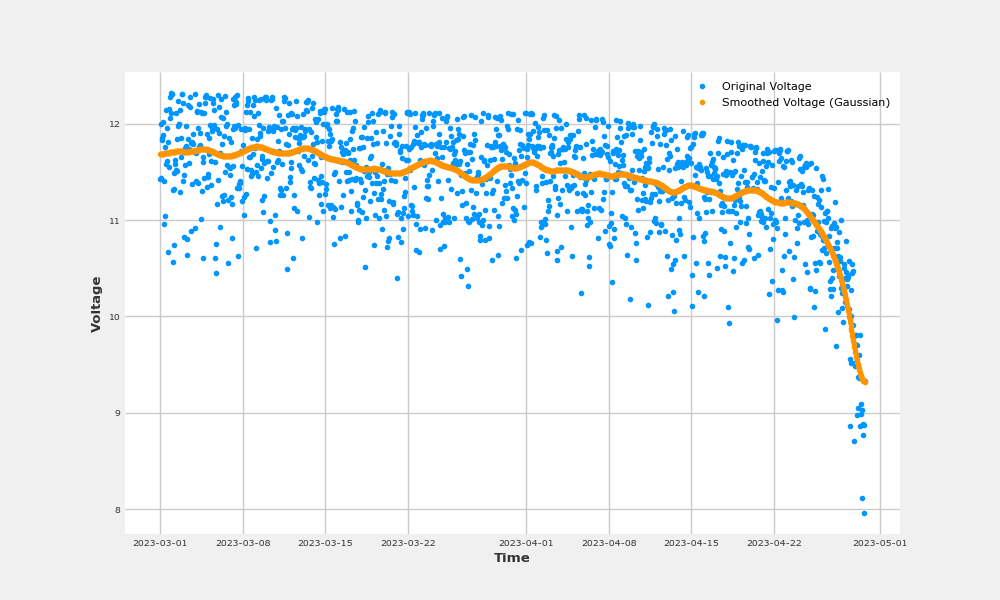

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


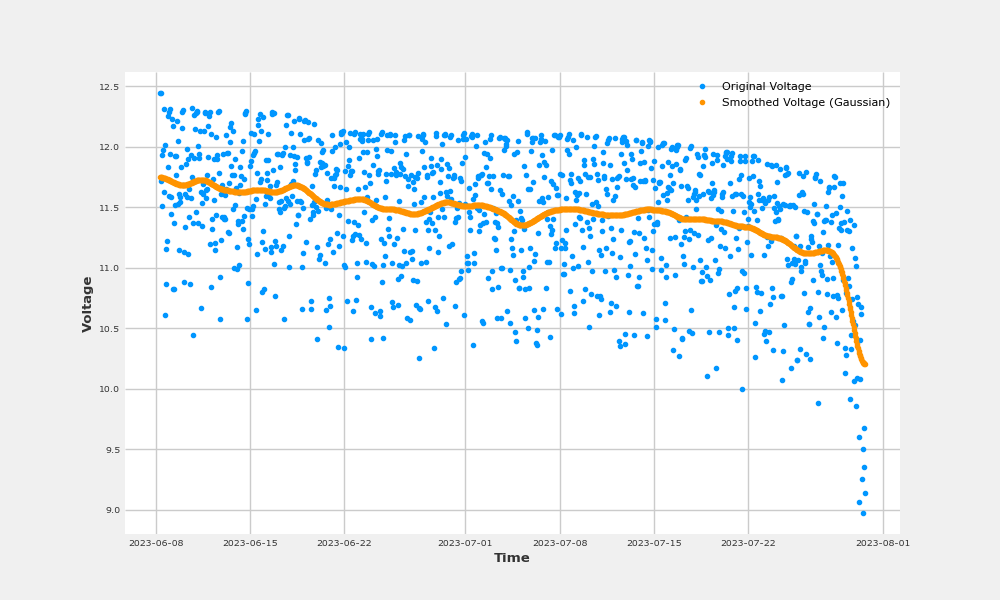

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


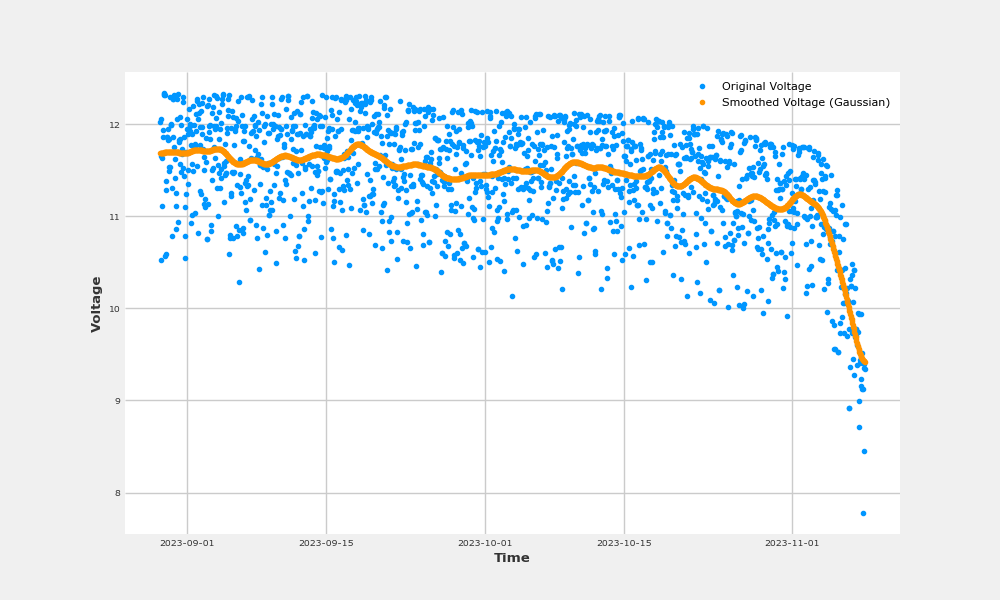

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


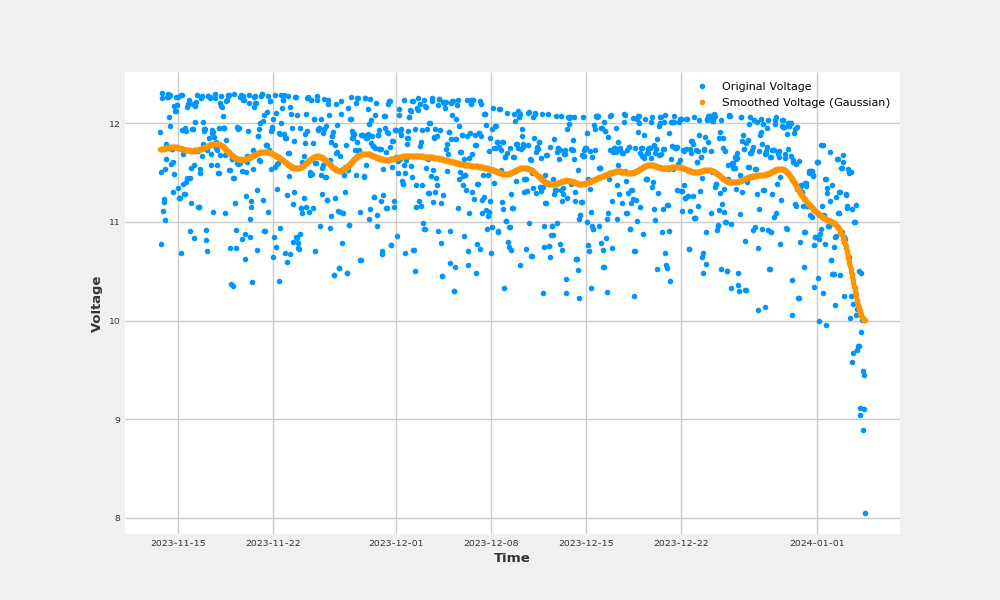

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


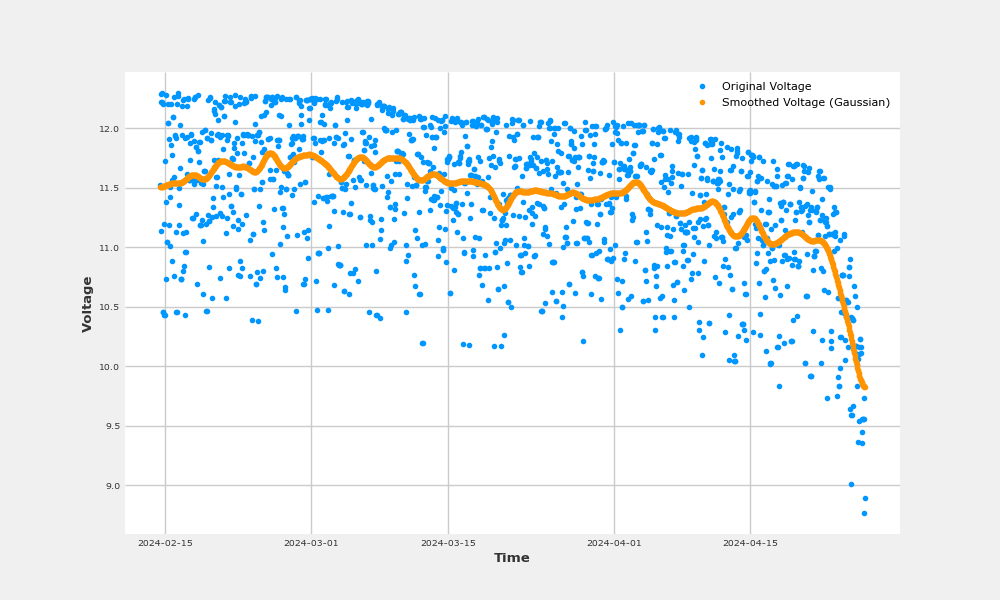

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


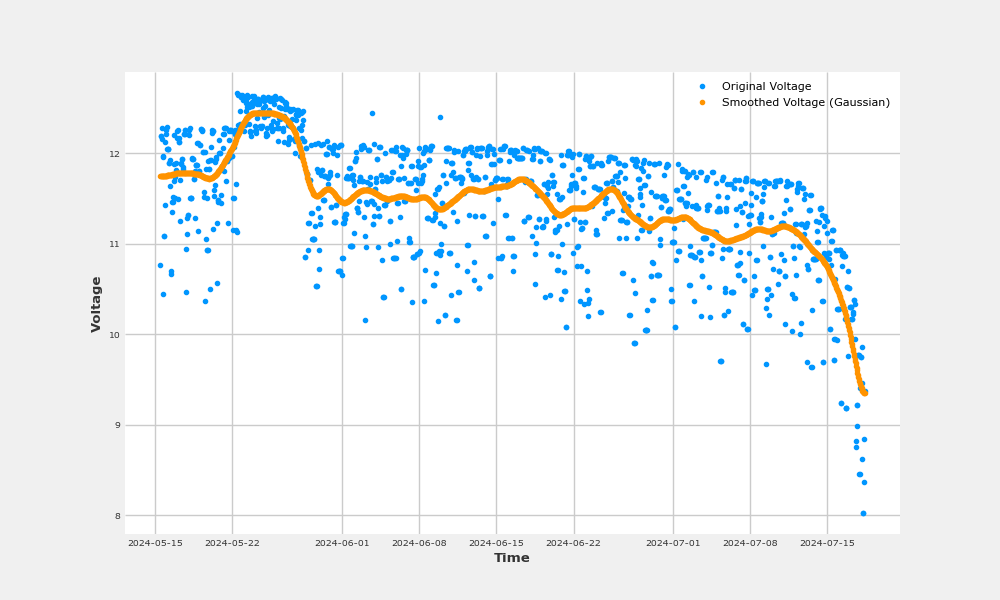

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


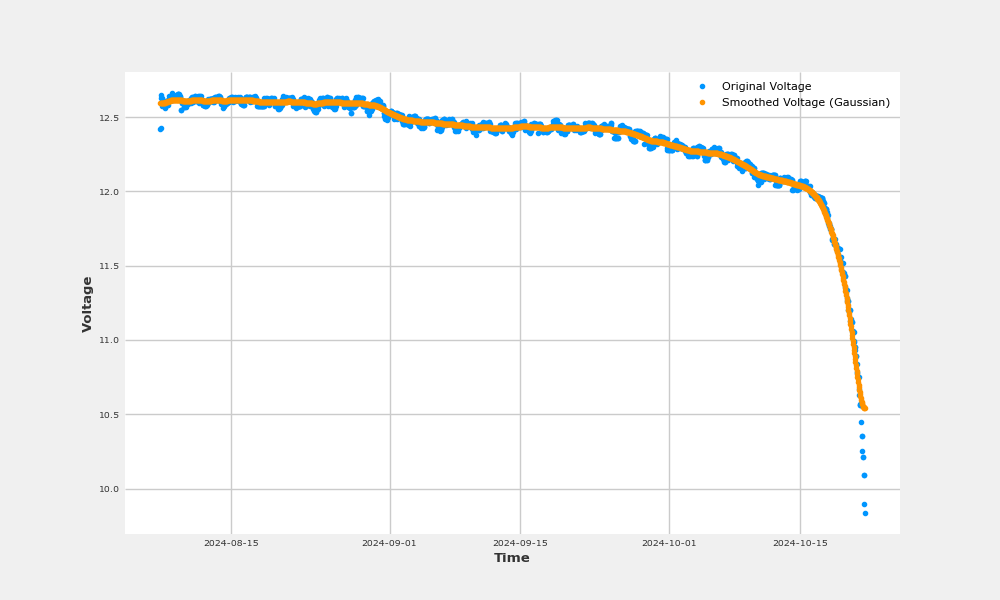

In [6]:
as_list_segments = [3, 4, 5, 6, 7, 8, 9]
Austevoll_Sor_df_segments = setup_as_data(Austevoll_Sor_df, smooth_sigma=18, list_segments=as_list_segments)

In [7]:
Austevoll_Sor_df_segments[3].columns

Index(['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0',
       'Time_Since_t0_n', 'year', 'month_0', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'Temperature',
       'Temperature_sum', 'sin_month', 'cos_month', 'sin_week', 'cos_week',
       'sin_day', 'cos_day', 'sin_hour', 'cos_hour',
       'smooth_System_Parameters.Input_Voltage',
       'System_Parameters.Input_Voltage'],
      dtype='object')

### Normalize input voltage for each segment using Scalar

In [8]:
from feature_adder import normalize_data

as_seg_scalers_iv = {}

for seg_key, seg_df in Austevoll_Sor_df_segments.items():
    seg_df, scaler_y = normalize_data(seg_df, 'System_Parameters.Input_Voltage')
    
    Austevoll_Sor_df_segments[seg_key] = seg_df
    
    as_seg_scalers_iv[seg_key] = scaler_y
    

as_seg_scalers_siv = {}
for seg_key, seg_df in Austevoll_Sor_df_segments.items():
    seg_df, scaler_y = normalize_data(seg_df, 'smooth_System_Parameters.Input_Voltage')
    
    Austevoll_Sor_df_segments[seg_key] = seg_df
    
    as_seg_scalers_siv[seg_key] = scaler_y

as_seg_scalers_iv, as_seg_scalers_siv

({3: Scaler, 4: Scaler, 5: Scaler, 6: Scaler, 7: Scaler, 8: Scaler, 9: Scaler},
 {3: Scaler, 4: Scaler, 5: Scaler, 6: Scaler, 7: Scaler, 8: Scaler, 9: Scaler})

In [9]:
Austevoll_Sor_df_segments[3].columns

Index(['Num_Not_Nan', 'Num_Nan', 'Num_Bytes', 'Time_Since_t0',
       'Time_Since_t0_n', 'year', 'month_0', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'Temperature',
       'Temperature_sum', 'sin_month', 'cos_month', 'sin_week', 'cos_week',
       'sin_day', 'cos_day', 'sin_hour', 'cos_hour',
       'smooth_System_Parameters.Input_Voltage',
       'System_Parameters.Input_Voltage', 'System_Parameters.Input_Voltage_n',
       'smooth_System_Parameters.Input_Voltage_n'],
      dtype='object')

### concatinate ausevold soor data

In [10]:
as_df = pd.concat(
    [Austevoll_Sor_df_segments[3], 
     Austevoll_Sor_df_segments[4], 
     Austevoll_Sor_df_segments[5], 
     #Austevoll_Sor_df_segments[6], 
     Austevoll_Sor_df_segments[7], 
     Austevoll_Sor_df_segments[8],
     #Austevoll_Sor_df_segments[9]
    ]
)

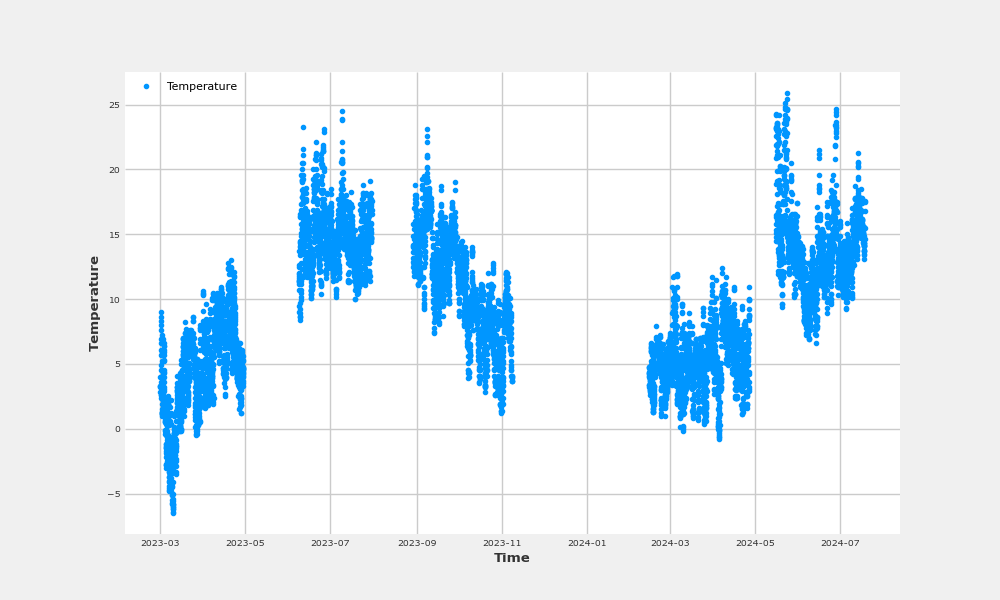

In [11]:
plot_dfs([as_df[['Temperature']]])

## model training

In [12]:
as_df.reset_index(inplace=True)
as_df.head(1)

,Time,Num_Not_Nan,Num_Nan,Num_Bytes,Time_Since_t0,Time_Since_t0_n,year,month_0,month_1,month_2,...,sin_week,cos_week,sin_day,cos_day,sin_hour,cos_hour,smooth_System_Parameters.Input_Voltage,System_Parameters.Input_Voltage,System_Parameters.Input_Voltage_n,smooth_System_Parameters.Input_Voltage_n
0,2023-03-01,20.0,29.0,206.0,0.0,0.0,2023.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,11.688707,11.42525,0.794929,0.969009


In [13]:

features =  ['Num_Not_Nan',
             'Num_Not_Nan_n',
        'Num_Nan',
        'Num_Nan_n',
        'Num_Bytes',
        'Num_Bytes_n',
        #'Time_Since_t0', 
        'Time_Since_t0_n', #****
        'year', #* 
        'month_0', 
        'month_1',
        'month_2', 
        'month_3', 
        'month_4', 
        'month_5', 
        'month_6', 
        'month_7',
        'month_8', 
        'month_9', 
        'month_10', 
        'month_11', 
        'weekday_0', 
        'weekday_1',
        'weekday_2', 
        'weekday_3', 
        'weekday_4', 
        'weekday_5', 
        'weekday_6',
        'Temperature',
        'Temperature_sum', 
        #'sin_month', 
        #'cos_month', 
        'sin_week', 
        'cos_week',
        #'sin_day', 
        #'cos_day', 
        #'sin_hour', 
        #'cos_hour',
        #'smooth_System_Parameters.Input_Voltage', 
        #'System_Parameters.Input_Voltage'
]

features =  ['Num_Not_Nan',
        'Num_Nan',
        'Time_Since_t0_n', #****
]

features =  ['Num_Not_Nan',
        'Num_Nan',
        'Time_Since_t0_n', #****
        'Temperature',
        'Temperature_sum',
]

features =  ['Num_Not_Nan',
        'Num_Nan',
        'Time_Since_t0_n', #****
        'Temperature',
        'Temperature_sum',
        'sin_hour',
        'cos_hour',
]

features =  [
        #'Num_Not_Nan',
        #'Num_Nan',
        #'Num_Bytes',
        'Time_Since_t0_n', #****
        'Temperature',
        #'Temperature_sum',
] # ****

target = 'smooth_System_Parameters.Input_Voltage'
target = 'System_Parameters.Input_Voltage_n'
target = 'smooth_System_Parameters.Input_Voltage_n'

In [14]:
X = as_df[features].copy()
y = as_df[target].copy()
len(X), len(y)

(7665, 7665)

In [15]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# normalize X
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression (1 neuron, linear activation)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Compute R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

c:\Users\yfess\Desktop\data\data_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2972 - mae: 0.4287 - val_loss: 0.0272 - val_mae: 0.1242
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0275 - mae: 0.1260 - val_loss: 0.0119 - val_mae: 0.0834
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0160 - mae: 0.0965 - val_loss: 0.0099 - val_mae: 0.0719
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0118 - mae: 0.0823 - val_loss: 0.0093 - val_mae: 0.0693
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0112 - mae: 0.0802 - val_loss: 0.0089 - val_mae: 0.0679
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0111 - mae: 0.0792 - val_loss: 0.0084 - val_mae: 0.0656
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0091 - mae: 0.0718 - val_loss: 0.0080 - val_mae: 0.0651
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0087 - mae: 0.0705 - val_loss: 0.0078 - val_mae: 0.0642
Epoch 9/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

## loss

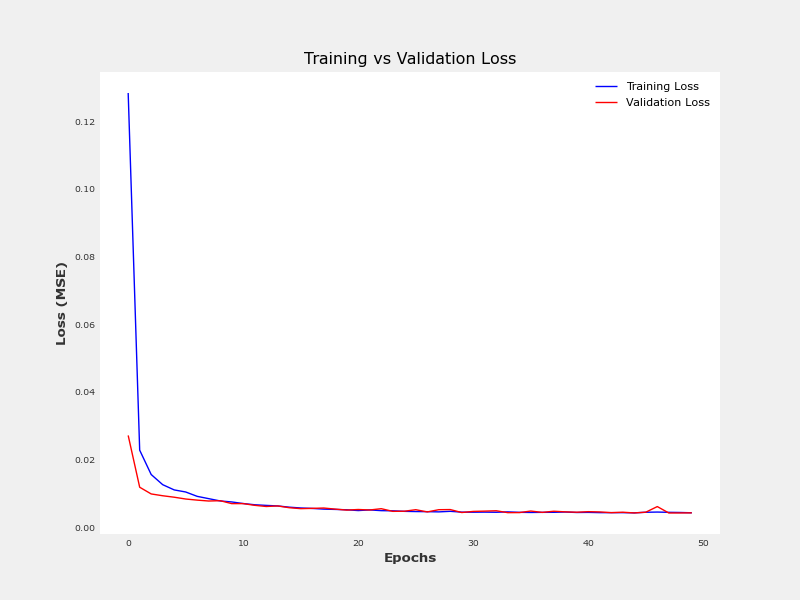

In [17]:
import matplotlib.pyplot as plt

# Plot Training & Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

## Test Values vs Predictions

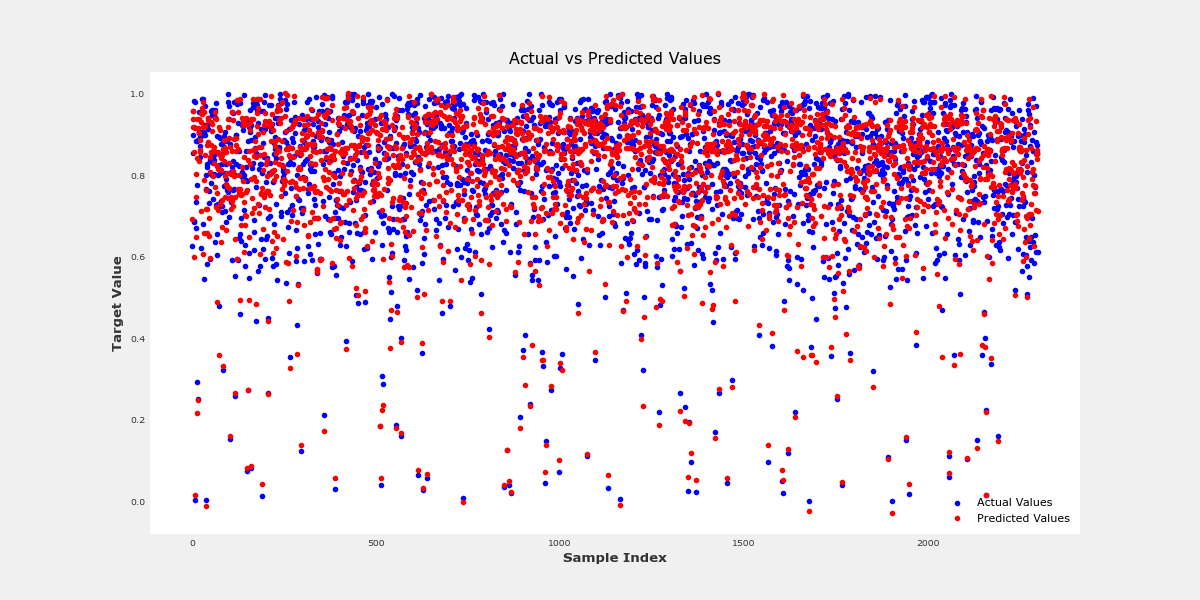

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Ensure y_test and y_pred are both NumPy arrays
y_test_np = y_test.to_numpy().flatten()  # Convert y_test to a NumPy array
y_pred_np = y_pred.flatten()  # Ensure predictions are also flattened

# Get the index from y_test to use for plotting
sample_indices = np.arange(len(y_test_np))  # Create a sequential index

# Plot actual test values
plt.plot(sample_indices, y_test_np, label="Actual Values", linestyle="none", marker=".", color="blue")

# Plot predicted values
plt.plot(sample_indices, y_pred_np, label="Predicted Values", linestyle="none", marker=".", color="red")

plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

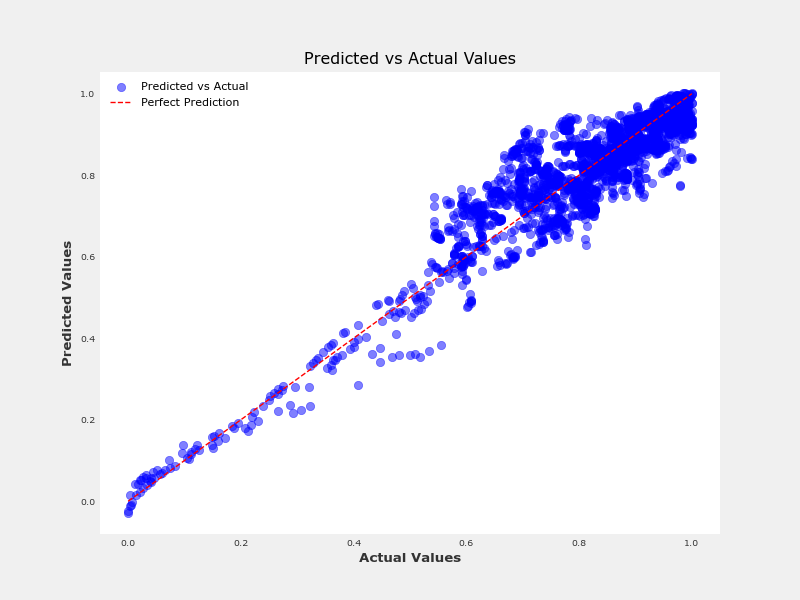

In [19]:

plt.figure(figsize=(8, 6))

# Scatter plot of predictions vs actual values
plt.scatter(y_test, y_pred, alpha=0.5, label="Predicted vs Actual", color="blue")

# Perfect prediction line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Perfect Prediction")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.show()

## prediction as

In [20]:
seg_to_predict = Austevoll_Sor_df_segments[3][features].copy()
seg_to_predict.head(1)

,Time_Since_t0_n,Temperature
Time,,
2023-03-01,0.0,4.0


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


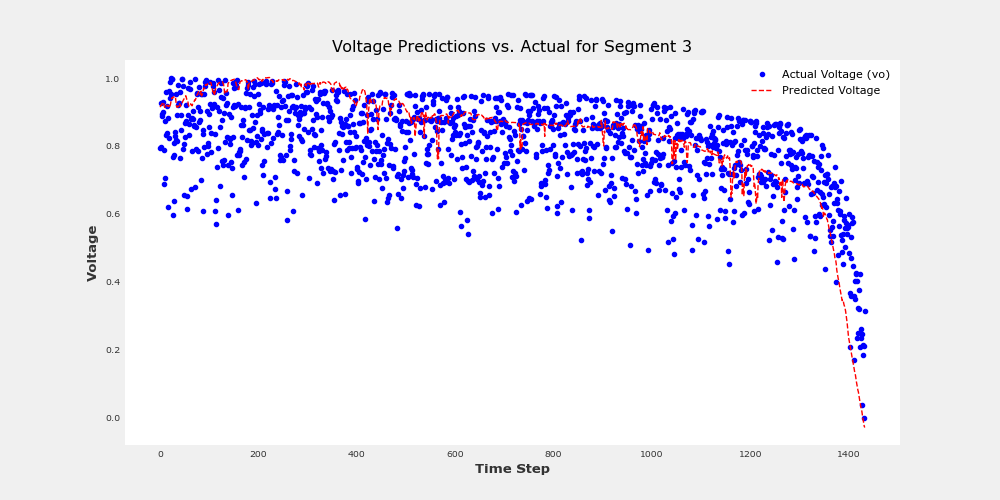

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


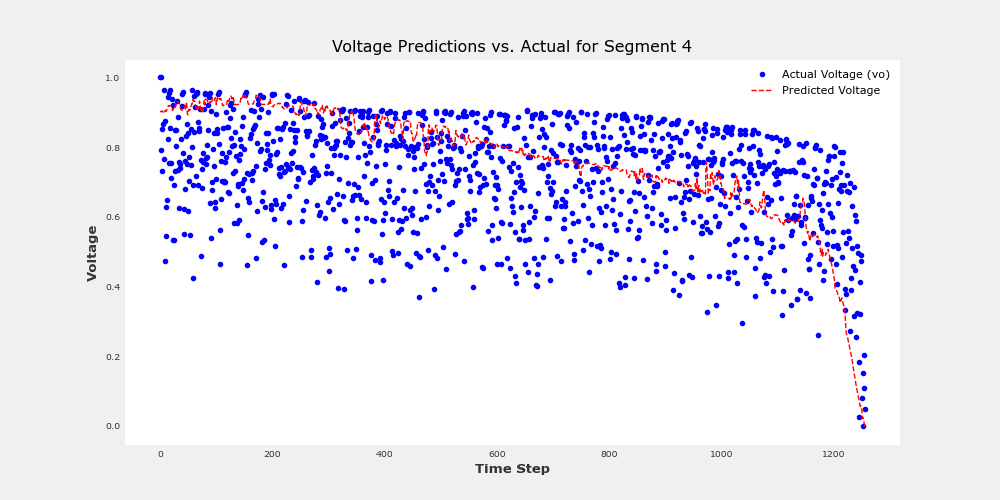

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


C:\Users\yfess\AppData\Local\Temp\ipykernel_11860\1799341369.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


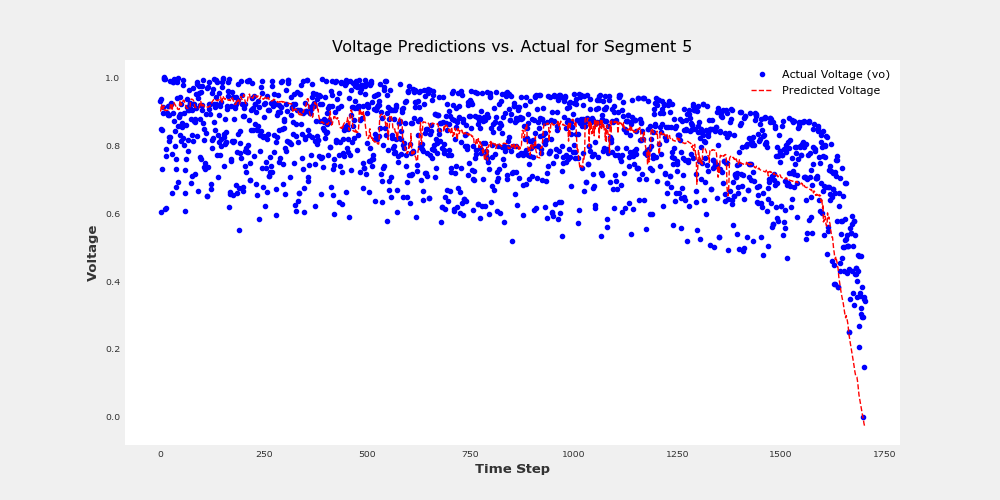

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


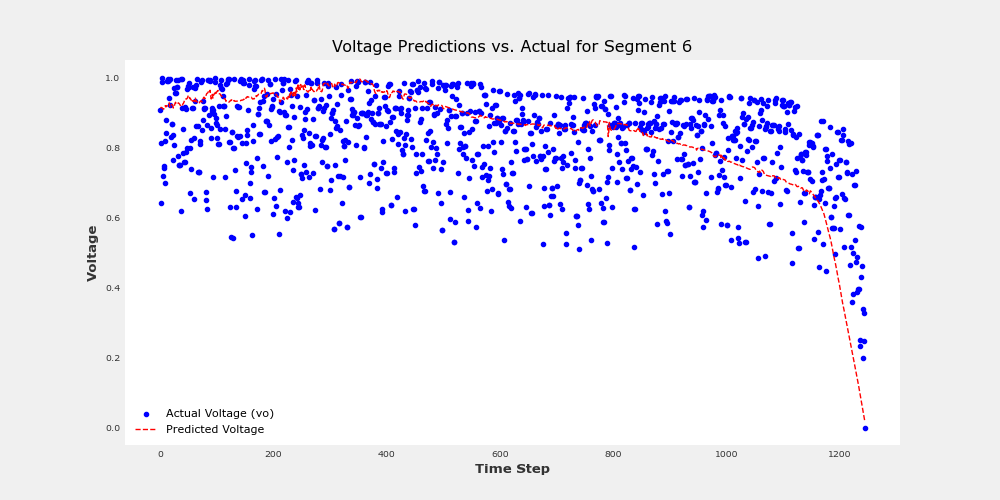

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


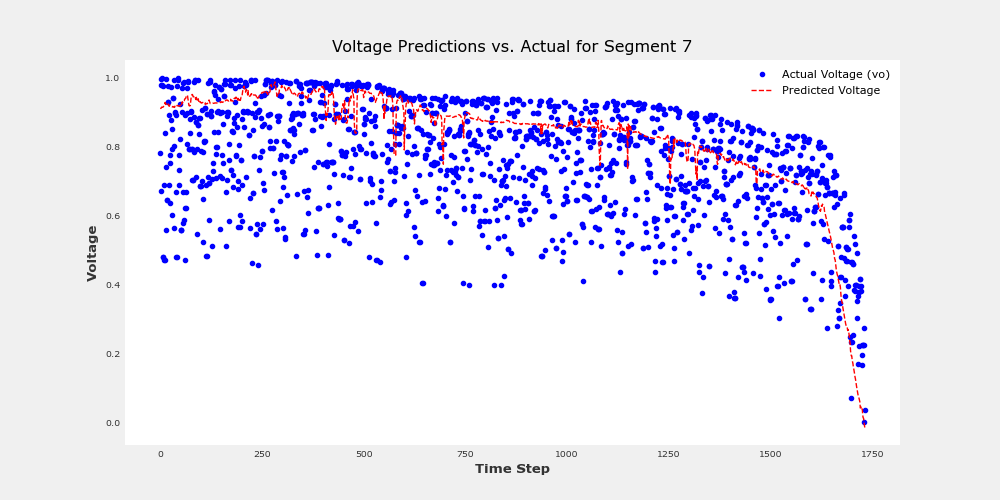

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


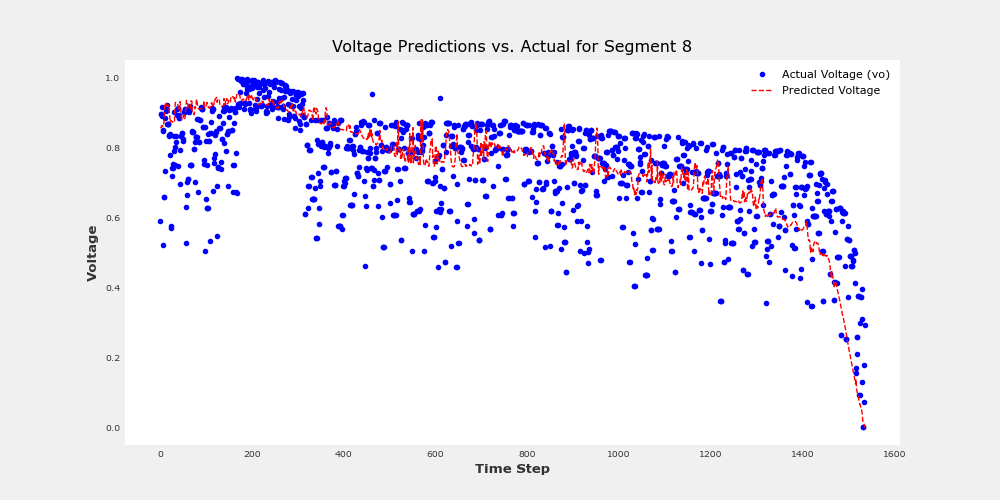

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


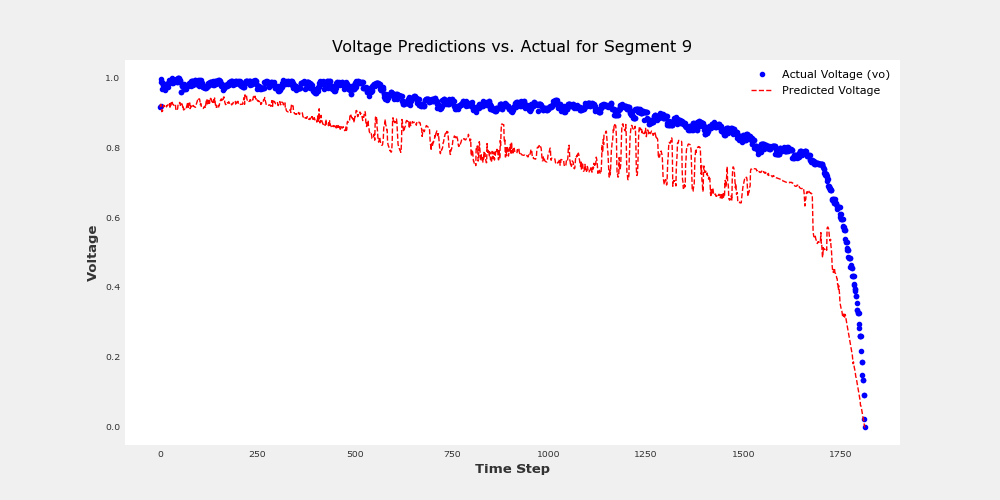

In [21]:
from feature_adder import inverse_transform
# inverse_transform(df: pd.DataFrame, column: str, scaler: Scaler)
segs_to_predict = [3, 4, 5, 6, 7, 8, 9]
for seg in segs_to_predict:
    seg_to_predict = Austevoll_Sor_df_segments[seg][features].copy()
    seg_to_predict = scaler.transform(seg_to_predict)
    prediction = model.predict(seg_to_predict)
    plt.figure(figsize=(10, 5))
    plt.plot(Austevoll_Sor_df_segments[seg]['System_Parameters.Input_Voltage_n'].values, label='Actual Voltage (vo)', linestyle="none",marker=".", color="blue")
    plt.plot(prediction, label='Predicted Voltage', linestyle="dashed", color="red")
    plt.xlabel("Time Step")
    plt.ylabel("Voltage")
    plt.title(f"Voltage Predictions vs. Actual for Segment {seg}")
    plt.legend()
    plt.show()

In [22]:
'''segs_to_predict = [3, 4, 5, 6, 7, 8, 9]
for seg in segs_to_predict:
    seg_to_predict = Austevoll_Sor_df_segments[seg][features].copy()
    seg_to_predict = scaler.transform(seg_to_predict)
    prediction = model.predict(seg_to_predict)
    plt.figure(figsize=(10, 5))
    plt.plot(Austevoll_Sor_df_segments[seg]['System_Parameters.Input_Voltage_n'].values, label='Actual Voltage (vo)', linestyle="none",marker=".", color="blue")
    plt.plot(prediction, label='Predicted Voltage', linestyle="dashed", color="red")
    plt.xlabel("Time Step")
    plt.ylabel("Voltage")
    plt.title(f"Voltage Predictions vs. Actual for Segment {seg}")
    plt.legend()
    plt.show()'''

'''# Extract before transformation (keep as Series)
vo = Austevoll_Sor_df_segments[3]['System_Parameters.Input_Voltage'].values

# Prepare data for prediction
seg_to_predict = Austevoll_Sor_df_segments[3][features].copy()
seg_to_predict = scaler.transform(seg_to_predict)



# Make predictions
prediction = model.predict(seg_to_predict)

# Plot Predictions
plt.figure(figsize=(10, 5))
plt.plot(vo, label='Actual Voltage (vo)', linestyle="none",marker=".", color="blue")
plt.plot(prediction, label='Predicted Voltage', linestyle="dashed", color="red")
plt.xlabel("Time Step")
plt.ylabel("Voltage")
plt.title("Voltage Predictions vs. Actual")
plt.legend()
plt.show()'''


'# Extract before transformation (keep as Series)\nvo = Austevoll_Sor_df_segments[3][\'System_Parameters.Input_Voltage\'].values\n\n# Prepare data for prediction\nseg_to_predict = Austevoll_Sor_df_segments[3][features].copy()\nseg_to_predict = scaler.transform(seg_to_predict)\n\n\n\n# Make predictions\nprediction = model.predict(seg_to_predict)\n\n# Plot Predictions\nplt.figure(figsize=(10, 5))\nplt.plot(vo, label=\'Actual Voltage (vo)\', linestyle="none",marker=".", color="blue")\nplt.plot(prediction, label=\'Predicted Voltage\', linestyle="dashed", color="red")\nplt.xlabel("Time Step")\nplt.ylabel("Voltage")\nplt.title("Voltage Predictions vs. Actual")\nplt.legend()\nplt.show()'

In [23]:
'''# Extract before transformation (keep as Series)
vo1 = Austevoll_Sor_df_segments[3]['System_Parameters.Input_Voltage'].values
v02 = Austevoll_Sor_df_segments[4]['System_Parameters.Input_Voltage'].values
vo3 = Austevoll_Sor_df_segments[5]['System_Parameters.Input_Voltage'].values
vo4 = Austevoll_Sor_df_segments[6]['System_Parameters.Input_Voltage'].values
vo5 = Austevoll_Sor_df_segments[7]['System_Parameters.Input_Voltage'].values
vo6 = Austevoll_Sor_df_segments[8]['System_Parameters.Input_Voltage'].values
vo7 = Austevoll_Sor_df_segments[9]['System_Parameters.Input_Voltage'].values

# Prepare data for prediction
seg_to_predict1 = Austevoll_Sor_df_segments[3][features].copy()
seg_to_predict1 = scaler.transform(seg_to_predict1)

seg_to_predict2 = Austevoll_Sor_df_segments[4][features].copy()
seg_to_predict2 = scaler.transform(seg_to_predict2)

seg_to_predict3 = Austevoll_Sor_df_segments[5][features].copy()
seg_to_predict3 = scaler.transform(seg_to_predict3)

seg_to_predict4 = Austevoll_Sor_df_segments[6][features].copy()
seg_to_predict4 = scaler.transform(seg_to_predict4)

seg_to_predict5 = Austevoll_Sor_df_segments[7][features].copy()
seg_to_predict5 = scaler.transform(seg_to_predict5)

seg_to_predict6 = Austevoll_Sor_df_segments[8][features].copy()
seg_to_predict6 = scaler.transform(seg_to_predict6)

seg_to_predict7 = Austevoll_Sor_df_segments[9][features].copy()
seg_to_predict7 = scaler.transform(seg_to_predict7)



# Make predictions
prediction1 = model.predict(seg_to_predict1)
prediction2 = model.predict(seg_to_predict2)
prediction3 = model.predict(seg_to_predict3)
prediction4 = model.predict(seg_to_predict4)
prediction5 = model.predict(seg_to_predict5)
prediction6 = model.predict(seg_to_predict6)
prediction7 = model.predict(seg_to_predict7)

# Plot Predictions
plt.figure(figsize=(10, 5))
#plt.plot(vo, label='Actual Voltage (vo)', linestyle="none",marker=".", color="blue")
plt.plot(prediction1, label='Predicted Voltage 1')
plt.plot(prediction2, label='Predicted Voltage 2')
plt.plot(prediction3, label='Predicted Voltage 3')
plt.plot(prediction4, label='Predicted Voltage 4')
plt.plot(prediction5, label='Predicted Voltage 5')
plt.plot(prediction6, label='Predicted Voltage 6')
plt.plot(prediction7, label='Predicted Voltage 7')

plt.xlabel("Time Step")
plt.ylabel("Voltage")
plt.title("Voltage Predictions vs. Actual")
plt.legend()
plt.show()
'''

'# Extract before transformation (keep as Series)\nvo1 = Austevoll_Sor_df_segments[3][\'System_Parameters.Input_Voltage\'].values\nv02 = Austevoll_Sor_df_segments[4][\'System_Parameters.Input_Voltage\'].values\nvo3 = Austevoll_Sor_df_segments[5][\'System_Parameters.Input_Voltage\'].values\nvo4 = Austevoll_Sor_df_segments[6][\'System_Parameters.Input_Voltage\'].values\nvo5 = Austevoll_Sor_df_segments[7][\'System_Parameters.Input_Voltage\'].values\nvo6 = Austevoll_Sor_df_segments[8][\'System_Parameters.Input_Voltage\'].values\nvo7 = Austevoll_Sor_df_segments[9][\'System_Parameters.Input_Voltage\'].values\n\n# Prepare data for prediction\nseg_to_predict1 = Austevoll_Sor_df_segments[3][features].copy()\nseg_to_predict1 = scaler.transform(seg_to_predict1)\n\nseg_to_predict2 = Austevoll_Sor_df_segments[4][features].copy()\nseg_to_predict2 = scaler.transform(seg_to_predict2)\n\nseg_to_predict3 = Austevoll_Sor_df_segments[5][features].copy()\nseg_to_predict3 = scaler.transform(seg_to_predict3)

In [24]:
'''seg_to_predict = Austevoll_Sor_df_segments[seg_to_predict].copy()

seg_to_predict.loc[:, ['Time_Since_t0']] = scaler.fit_transform(seg_to_predict[['Time_Since_t0']])
seg_to_predict.loc[:, ['num_not_Nan']] = scaler.fit_transform(seg_to_predict[['num_not_Nan']])

X_to_predict = seg_to_predict[['Time_Since_t0', 'num_not_Nan']].copy()

y_to_predict = seg_to_predict['System_Parameters.Input_Voltage'].copy()

y_predicted = model.predict(X_to_predict)
mse = mean_squared_error(y_to_predict, y_predicted)
print(f"Mean Squared Error: {mse:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_to_predict)), y_to_predict.values, label="Actual Values", marker='o')
plt.scatter(range(len(y_predicted)), y_predicted, label="Predicted Values", marker='x')
plt.title("Actual vs Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("System_Parameters.Input_Voltage")
plt.legend()
plt.grid()
plt.show()'''

'seg_to_predict = Austevoll_Sor_df_segments[seg_to_predict].copy()\n\nseg_to_predict.loc[:, [\'Time_Since_t0\']] = scaler.fit_transform(seg_to_predict[[\'Time_Since_t0\']])\nseg_to_predict.loc[:, [\'num_not_Nan\']] = scaler.fit_transform(seg_to_predict[[\'num_not_Nan\']])\n\nX_to_predict = seg_to_predict[[\'Time_Since_t0\', \'num_not_Nan\']].copy()\n\ny_to_predict = seg_to_predict[\'System_Parameters.Input_Voltage\'].copy()\n\ny_predicted = model.predict(X_to_predict)\nmse = mean_squared_error(y_to_predict, y_predicted)\nprint(f"Mean Squared Error: {mse:.4f}")\n\nplt.figure(figsize=(10, 6))\nplt.scatter(range(len(y_to_predict)), y_to_predict.values, label="Actual Values", marker=\'o\')\nplt.scatter(range(len(y_predicted)), y_predicted, label="Predicted Values", marker=\'x\')\nplt.title("Actual vs Predicted Values")\nplt.xlabel("Sample Index")\nplt.ylabel("System_Parameters.Input_Voltage")\nplt.legend()\nplt.grid()\nplt.show()'

## ausevoll nord

### Get Data

In [25]:
Austevoll_Nord_file_path = "C:\\Users\\yfess\\Desktop\\data\\row_data\\SmartOcean-Data-featherfiles\\Austevoll_Nord\\Austevoll_data_instrument.feather"
print(Austevoll_Nord_file_path)
Austevoll_Nord_df = pd.read_feather(Austevoll_Nord_file_path)
Austevoll_Nord_df.set_index('Time', inplace=True)
len(Austevoll_Nord_df)

C:\Users\yfess\Desktop\data\row_data\SmartOcean-Data-featherfiles\Austevoll_Nord\Austevoll_data_instrument.feather


24219

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


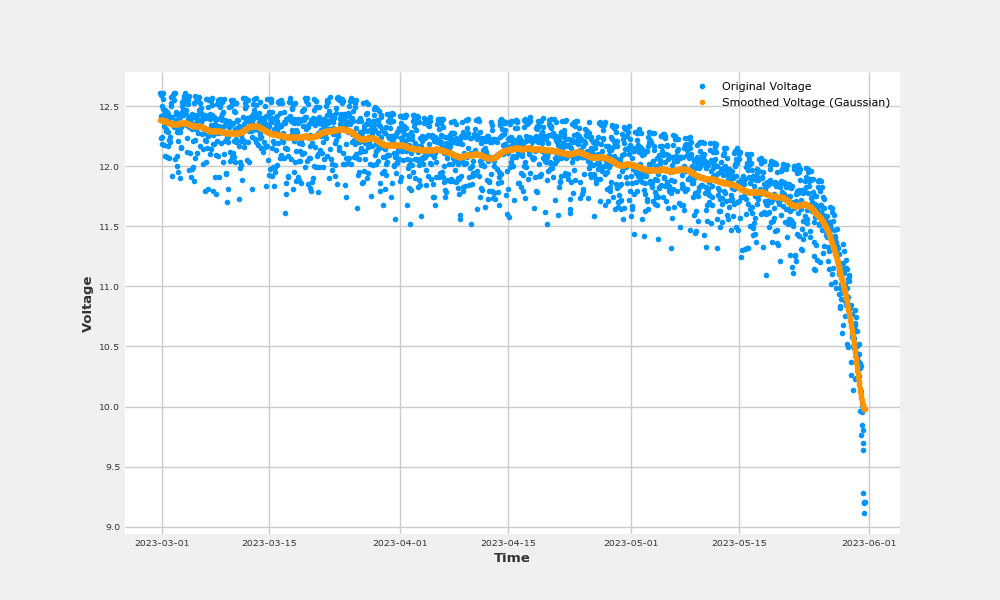

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


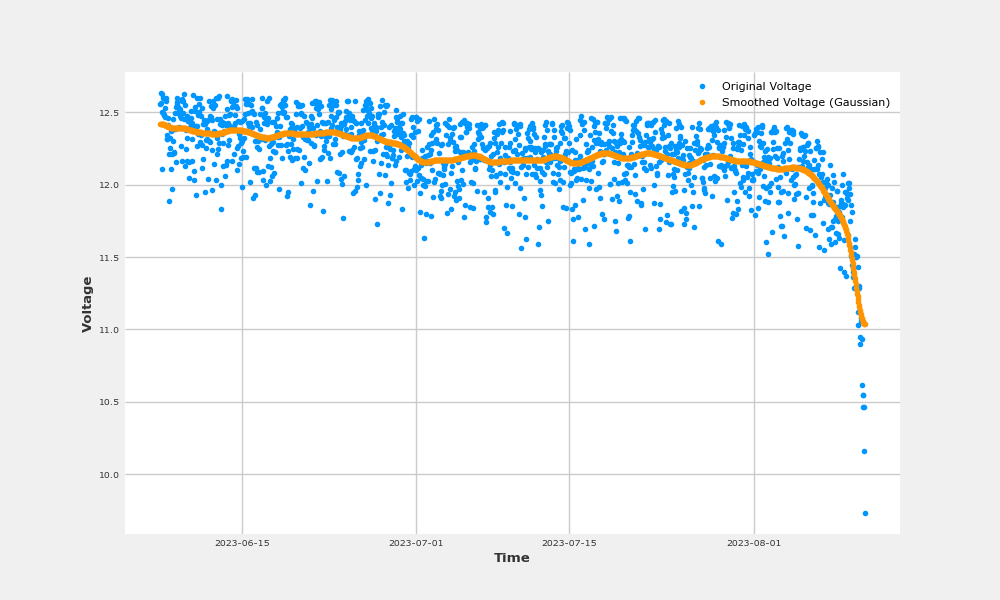

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


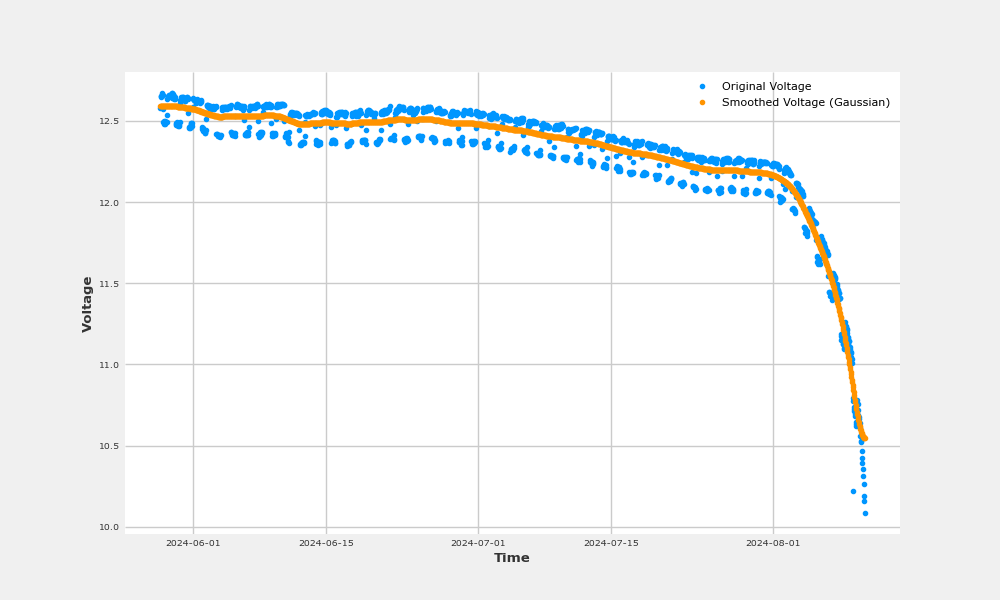

The provided DatetimeIndex was associated with a timezone, which is currently not supported by xarray. To avoid unexpected behaviour, the tz information was removed. Consider calling `ts.time_index.tz_localize(UTC)` when exporting the results.To plot the series with the right time steps, consider setting the matplotlib.pyplot `rcParams['timezone']` parameter to automatically convert the time axis back to the original timezone.


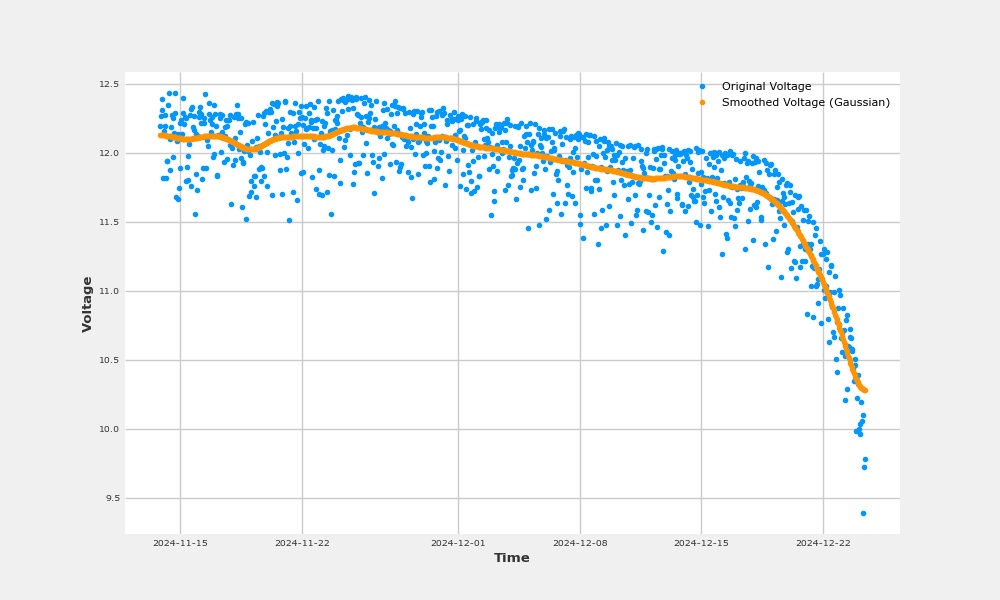

In [26]:
an_list_segments = [2,3,5,7]
Austevoll_Nord_df_segments = setup_an_data(Austevoll_Nord_df, smooth_sigma=18, list_segments=an_list_segments)

### Normalize input voltage for each segment using Scalar

In [27]:
from feature_adder import normalize_data

an_seg_scalers_iv = {}

for seg_key, seg_df in Austevoll_Nord_df_segments.items():
    seg_df, scaler_y = normalize_data(seg_df, 'System_Parameters.Input_Voltage')
    
    Austevoll_Nord_df_segments[seg_key] = seg_df
    
    an_seg_scalers_iv[seg_key] = scaler_y



an_seg_scalers_siv = {}
for seg_key, seg_df in Austevoll_Nord_df_segments.items():
    seg_df, scaler_y = normalize_data(seg_df, 'smooth_System_Parameters.Input_Voltage')
    
    Austevoll_Nord_df_segments[seg_key] = seg_df
    
    an_seg_scalers_siv[seg_key] = scaler_y

an_seg_scalers_iv, an_seg_scalers_siv

({2: Scaler, 3: Scaler, 5: Scaler, 7: Scaler},
 {2: Scaler, 3: Scaler, 5: Scaler, 7: Scaler})

## prediction an

In [28]:
seg_to_predict = Austevoll_Nord_df_segments[3][features].copy()
seg_to_predict.head(1)

,Time_Since_t0_n,Temperature
Time,,
2023-06-07 12:00:00,0.0,12.0


69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


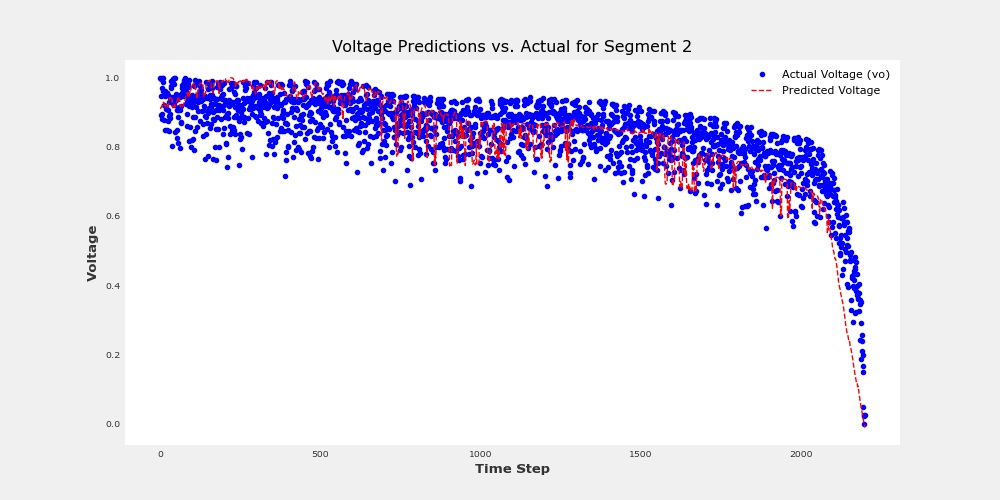

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


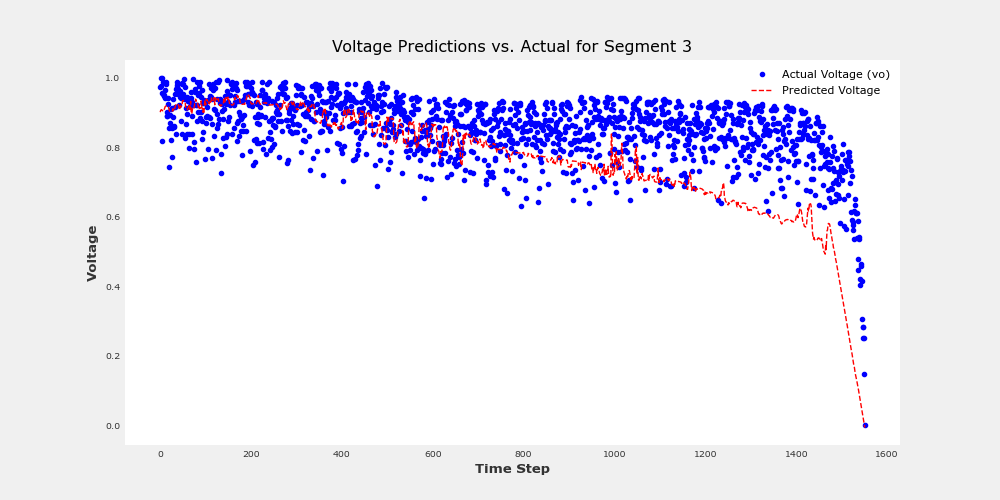

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


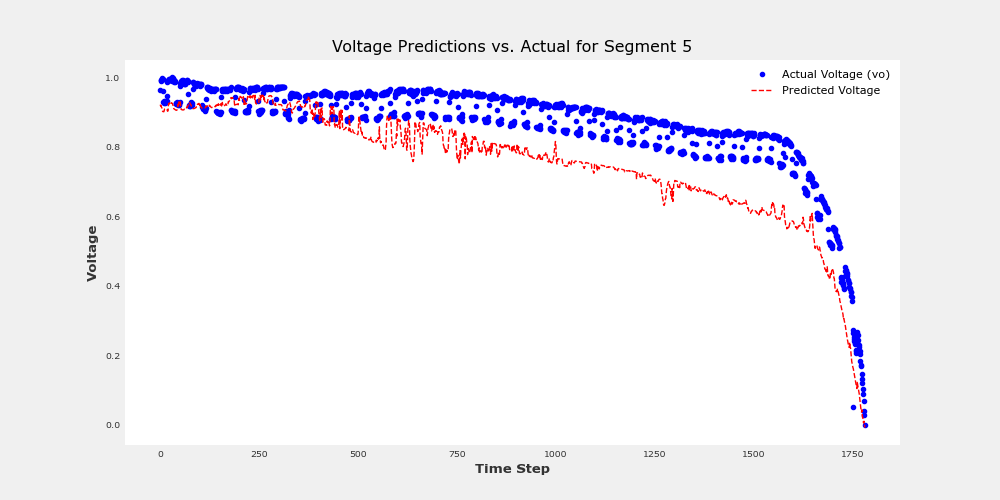

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


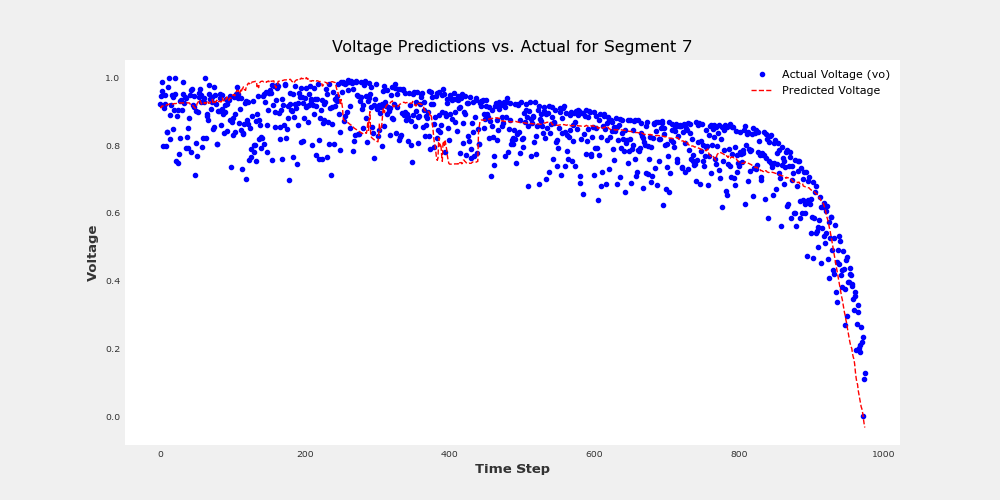

In [29]:
from feature_adder import inverse_transform
# inverse_transform(df: pd.DataFrame, column: str, scaler: Scaler)
segs_to_predict = [2,3,5,7]
for seg in segs_to_predict:
    seg_to_predict = Austevoll_Nord_df_segments[seg][features].copy()
    seg_to_predict = scaler.transform(seg_to_predict)
    prediction = model.predict(seg_to_predict)
    plt.figure(figsize=(10, 5))
    plt.plot(Austevoll_Nord_df_segments[seg]['System_Parameters.Input_Voltage_n'].values, label='Actual Voltage (vo)', linestyle="none",marker=".", color="blue")
    plt.plot(prediction, label='Predicted Voltage', linestyle="dashed", color="red")
    plt.xlabel("Time Step")
    plt.ylabel("Voltage")
    plt.title(f"Voltage Predictions vs. Actual for Segment {seg}")
    plt.legend()
    plt.show()

# fin